In [5]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
drug_reviews_drugs_com = fetch_ucirepo(id=462)

# data (as pandas dataframes)
X = drug_reviews_drugs_com.data.features

# metadata
print(drug_reviews_drugs_com.metadata)

# variable information
print(drug_reviews_drugs_com.variables)


{'uci_id': 462, 'name': 'Drug Reviews (Drugs.com)', 'repository_url': 'https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com', 'data_url': 'https://archive.ics.uci.edu/static/public/462/data.csv', 'abstract': 'The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Text'], 'num_instances': 215063, 'num_features': 6, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5SK5S', 'creators': ['Surya Kallumadi', 'Felix Grer'], 'intro_paper': {'title': 'Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning', 'authors': 'F. Grä

In [7]:
X

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...
215058,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
215059,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
215060,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
215061,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [8]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
X.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [10]:
X.condition.value_counts()

condition
Birth Control                                   38436
Depression                                      12164
Pain                                             8245
Anxiety                                          7812
Acne                                             7435
                                                ...  
Systemic Candidiasis                                1
Wilson's Disease                                    1
unctional Gastric Disorde                           1
Sepsis                                              1
105</span> users found this comment helpful.        1
Name: count, Length: 916, dtype: int64

In [11]:
X1=X[(X['condition']=='Birth Control')|(X['condition']=='Depression')|(X['condition']=='Pain')|(X['condition']=='Anxiety')]

In [12]:
X.shape

(215063, 6)

In [13]:
X1.shape

(66657, 6)

In [14]:
X2=X1.drop(['drugName','rating','date','usefulCount'],axis=1)

In [15]:
X2

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."
...,...,...
215056,Birth Control,"""I was on Microgestin for about 3 years. Over ..."
215057,Birth Control,"""I started taking Apri about 7 months ago. My ..."
215059,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra..."
215060,Birth Control,"""I&#039;m married, 34 years old and I have no ..."


**EDA**

In [16]:
X2.condition.value_counts()

condition
Birth Control    38436
Depression       12164
Pain              8245
Anxiety           7812
Name: count, dtype: int64

In [17]:
X2.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."


In [18]:
X2_birth=X2[X2['condition']=='Birth Control']
X2_dep=X2[X2['condition']=='Depression']
X2_pain=X2[X2['condition']=='Pain']
X2_anxiety=X2[X2['condition']=='Anxiety']

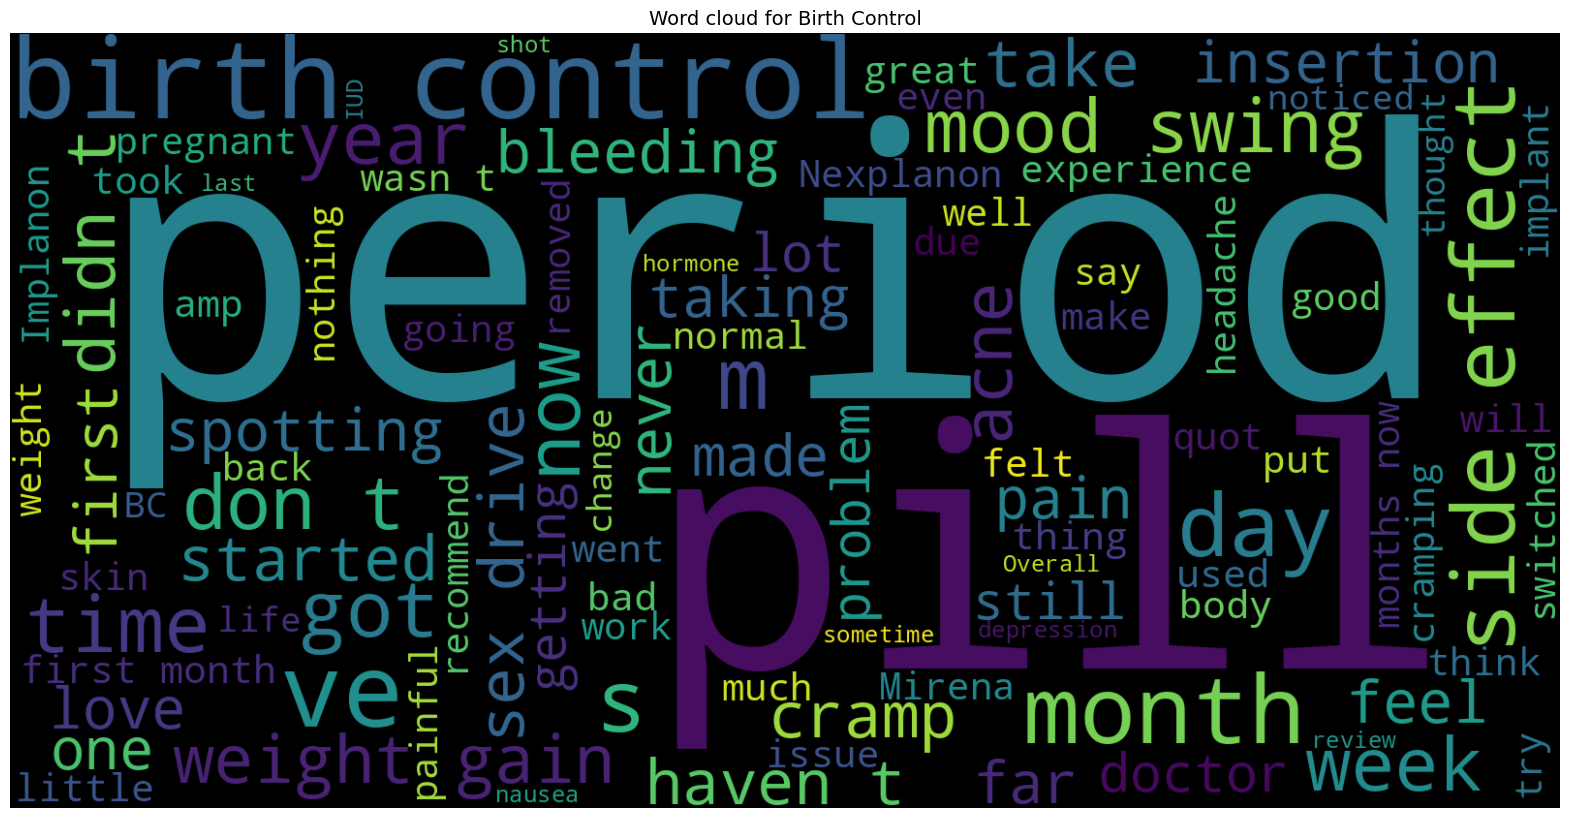

In [19]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=100, width=1600, height=800).generate("".join(X2_birth.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word cloud for Birth Control",fontsize=14)
plt.axis("off")
plt.show()

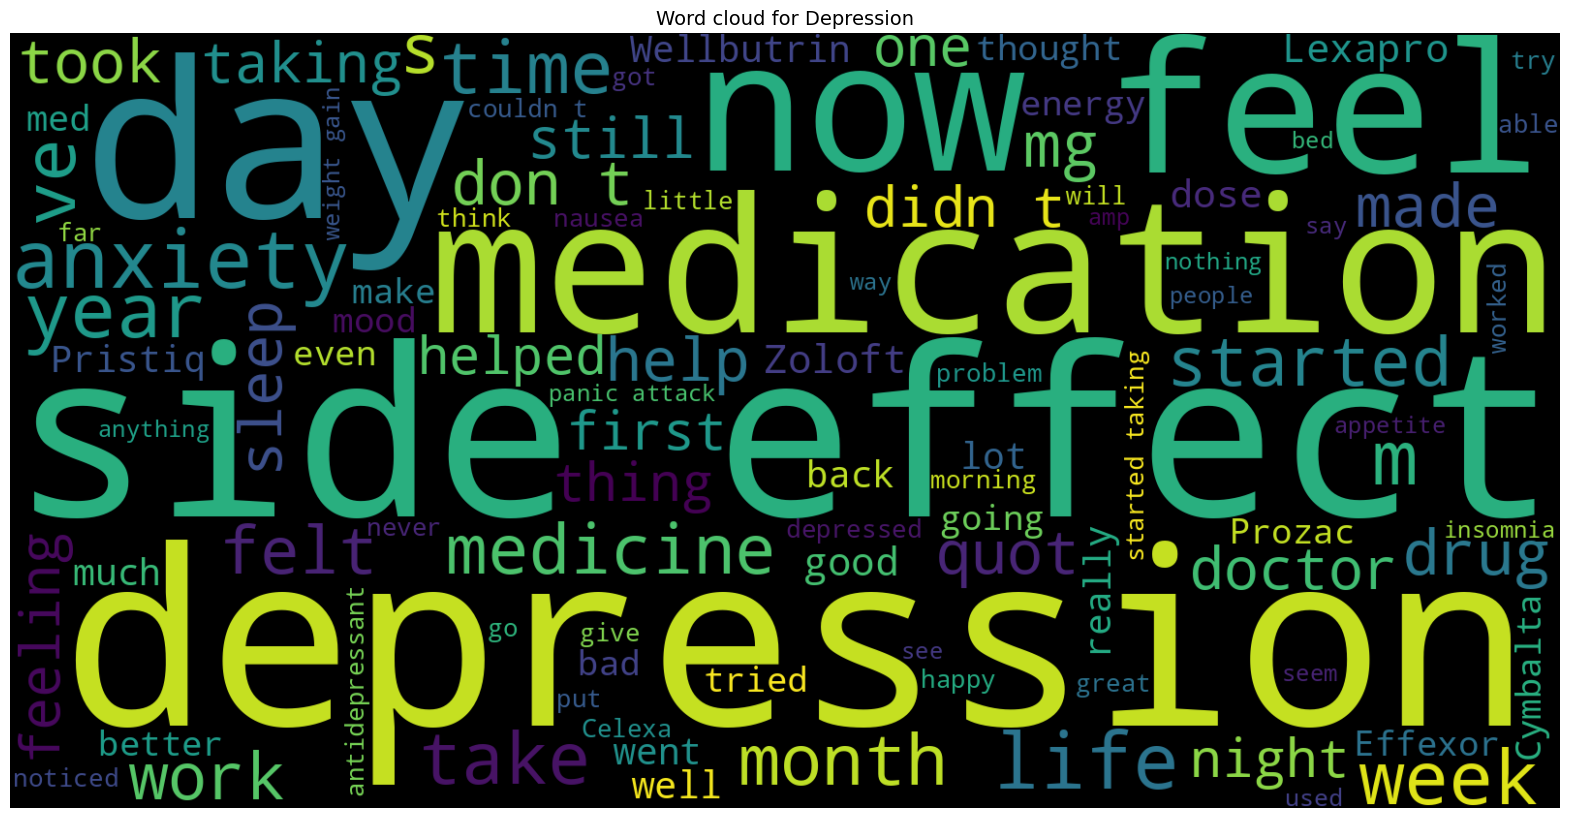

In [20]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=100, width=1600, height=800).generate("".join(X2_dep.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word cloud for Depression",fontsize=14)
plt.axis("off")
plt.show()

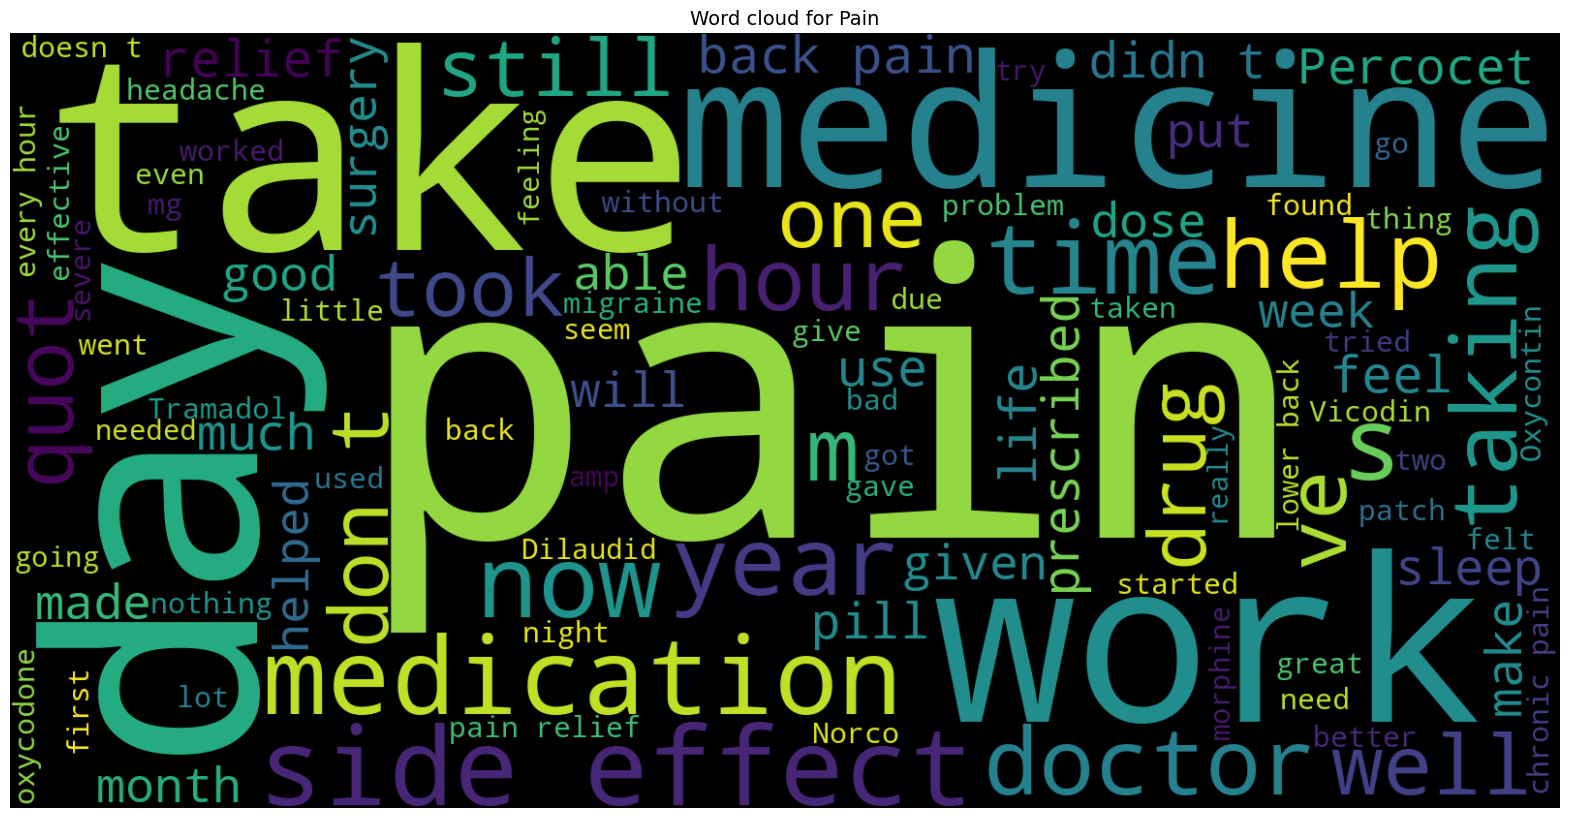

In [21]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=100, width=1600, height=800).generate("".join(X2_pain.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word cloud for Pain",fontsize=14)
plt.axis("off")
plt.show()

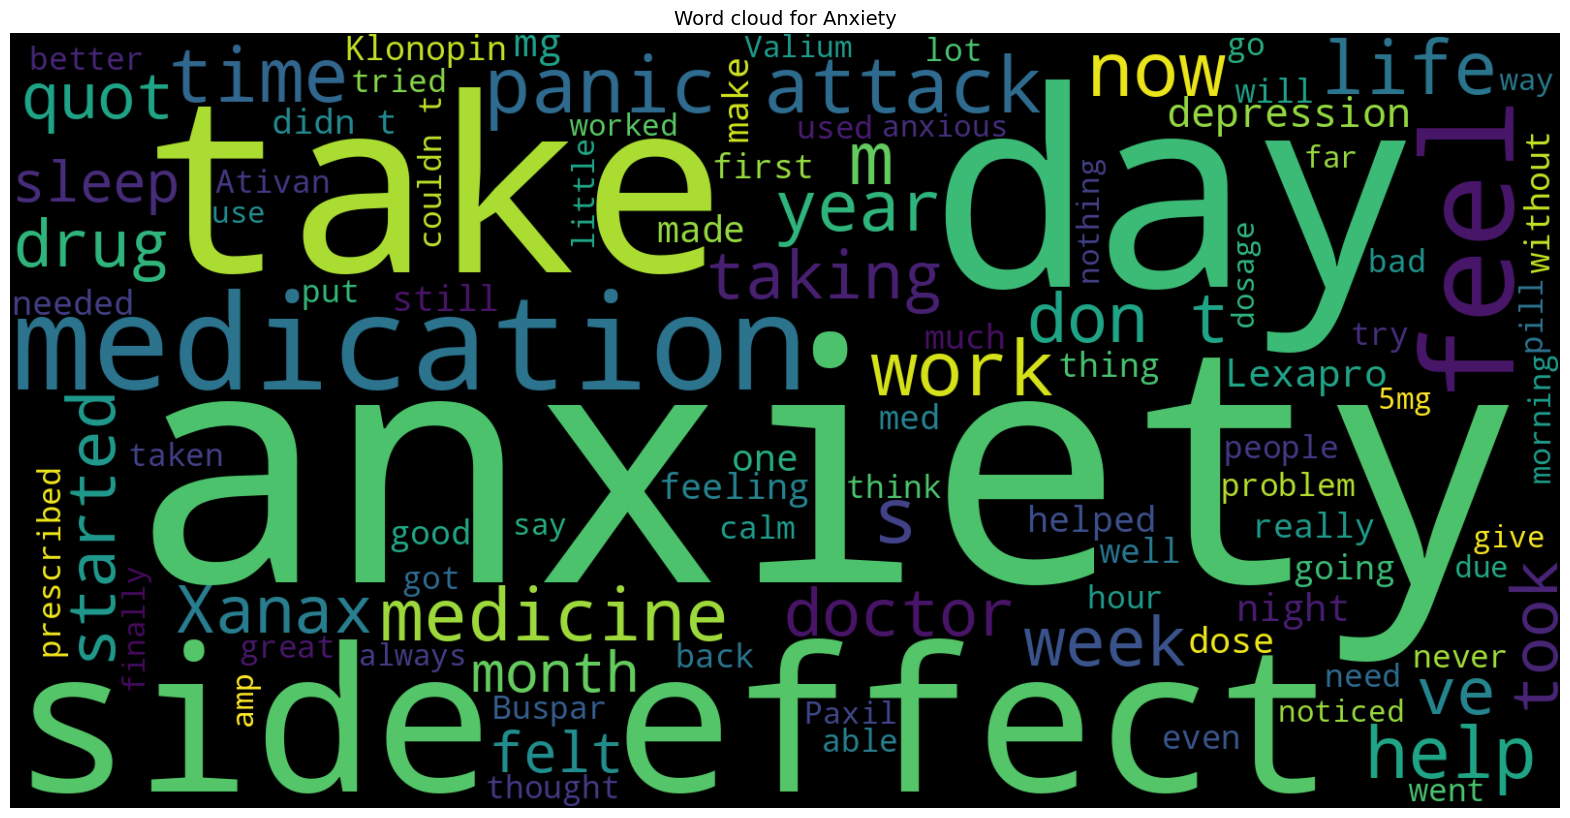

In [22]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=100, width=1600, height=800).generate("".join(X2_anxiety.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word cloud for Anxiety",fontsize=14)
plt.axis("off")
plt.show()

**Data Cleaning**

In [23]:
for i,col in enumerate(X2.columns):
  X2.iloc[:,i]=X2.iloc[:,i].astype(str).str.replace('"','')

**Removal of Stopwords**

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [26]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

**Lemmatization**

In [27]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [29]:
porter=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [30]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [31]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


**HTML Parsing**

In [32]:
from bs4 import BeautifulSoup
import re

In [33]:
def html_parsing(raw_review):
  review_text=BeautifulSoup(raw_review,'html.parser').get_text()
  return review_text

In [34]:
X2['review_clean']=X2['review'].apply(html_parsing)

<ipython-input-33-cc7b33fadc51>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text=BeautifulSoup(raw_review,'html.parser').get_text()


In [35]:
X2

,condition,review,review_clean
2,Birth Control,"I used to take another oral contraceptive, whi...","I used to take another oral contraceptive, whi..."
3,Birth Control,This is my first time using any form of birth ...,This is my first time using any form of birth ...
9,Birth Control,I had been on the pill for many years. When my...,I had been on the pill for many years. When my...
11,Depression,"I have taken anti-depressants for years, with ...","I have taken anti-depressants for years, with ..."
14,Birth Control,Started Nexplanon 2 months ago because I have ...,Started Nexplanon 2 months ago because I have ...
...,...,...,...
215056,Birth Control,I was on Microgestin for about 3 years. Over t...,I was on Microgestin for about 3 years. Over t...
215057,Birth Control,I started taking Apri about 7 months ago. My b...,I started taking Apri about 7 months ago. My b...
215059,Anxiety,I&#039;ve been taking Lexapro (escitaploprgram...,I've been taking Lexapro (escitaploprgram) sin...
215060,Birth Control,"I&#039;m married, 34 years old and I have no k...","I'm married, 34 years old and I have no kids. ..."


**Stopwords removal**

In [36]:
def stopwords_removal(raw_review):
   lines = raw_review.lower().splitlines()
   processed_lines = []
   for line in lines:
        words = line.split()
        meaningful_words = [w for w in words if w not in stop]
        processed_lines.append(" ".join(meaningful_words))

   return "\n".join(processed_lines)

In [37]:
X2['review_clean']=X2['review_clean'].apply(stopwords_removal)

In [38]:
X3=X2.drop("review",axis=1)

In [39]:
X3

,condition,review_clean
2,Birth Control,"used take another oral contraceptive, 21 pill ..."
3,Birth Control,first time using form birth control. i'm glad ...
9,Birth Control,"pill many years. doctor changed rx chateal, ef..."
11,Depression,"taken anti-depressants years, improvement most..."
14,Birth Control,started nexplanon 2 months ago minimal amount ...
...,...,...
215056,Birth Control,"microgestin 3 years. past year, started get ex..."
215057,Birth Control,started taking apri 7 months ago. breats got n...
215059,Anxiety,i've taking lexapro (escitaploprgram) since fe...
215060,Birth Control,"i'm married, 34 years old kids. taking pill ha..."


In [40]:
X3['condition'].value_counts()

condition
Birth Control    38436
Depression       12164
Pain              8245
Anxiety           7812
Name: count, dtype: int64

**Balancing the data**

In [41]:
from sklearn.utils import resample

In [42]:
X3_majority = X3[X3['condition'] == 'Birth Control']
X3_depression = X3[X3['condition'] == 'Depression']
X3_pain = X3[X3['condition'] == 'Pain']
X3_anxiety = X3[X3['condition'] == 'Anxiety']

In [43]:
X3_majority_downsampled = resample(X3_majority,
                                   replace=False,
                                   n_samples=8245,
                                   random_state=42)

In [44]:
X3_depression_upsampled = resample(X3_depression,
                                   replace=True,
                                   n_samples=8245,
                                   random_state=42)

In [45]:
X3_anxiety_upsampled = resample(X3_anxiety,
                                replace=True,
                                n_samples=8245,
                                random_state=42)

In [46]:
X3_balanced = pd.concat([X3_majority_downsampled, X3_depression_upsampled, X3_pain, X3_anxiety_upsampled])

In [47]:
print(X3_balanced['condition'].value_counts())

condition
Birth Control    8245
Depression       8245
Pain             8245
Anxiety          8245
Name: count, dtype: int64


In [48]:
X3_balanced

,condition,review_clean
100020,Birth Control,please read!!!!!!!!!!!!!!\nhi all! i'm 18 year...
91128,Birth Control,switched ocella taking yaz 3months. pcos well....
77333,Birth Control,"honestly, one worst birth control pills i've e..."
52361,Birth Control,"went get iud, decided look online read women e..."
12023,Birth Control,hi everyone. going start saying every birth co...
...,...,...
175648,Anxiety,"suffer sever depression, severe anxiety, sever..."
7392,Anxiety,started taking medication last night already f...
67578,Anxiety,"diagnosed gad, panic disorder ptsd. hard time ..."
12389,Anxiety,"can't sleep, talking fast heart feels like goi..."


**Creating features and Target Variables**

In [49]:
X_feat=X3_balanced["review_clean"]
y=X3_balanced["condition"]

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_feat,y,stratify=y,test_size=0.2,random_state=0)

In [51]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  plt.imshow(cm, cmap, interpolation='nearest')
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matric")
  else:
    print("Confusion matrix,without normalization")

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment="center",color="white"if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

**Bag of words**

In [52]:
count_vectorizer=CountVectorizer(stop_words="english")
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

**Naive Bayes Classifier**

In [49]:
mnb=MultinomialNB()
mnb.fit(count_train,y_train)
pred=mnb.predict(count_test)
score=metrics.accuracy_score(y_test,pred)

Confusion matrix,without normalization


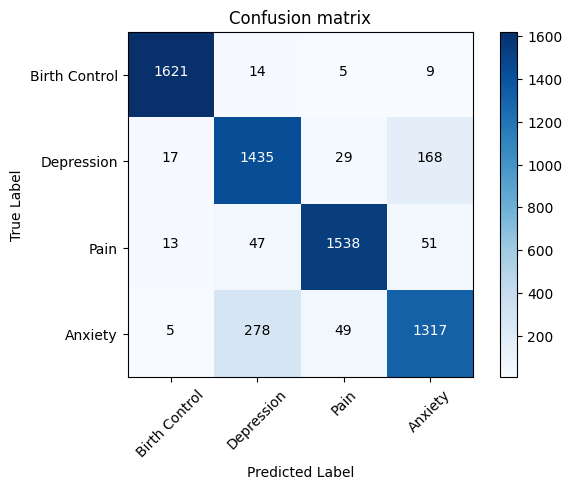

In [50]:
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [51]:
print("Accuracy:", score)

Accuracy: 0.8961491813220134


**Passive Aggressive Classifier**

In [52]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

In [53]:
passive=PassiveAggressiveClassifier()

In [54]:
passive.fit(count_train,y_train)
pred_pac=passive.predict(count_test)
score_pac=metrics.accuracy_score(y_test,pred)

Confusion matrix,without normalization


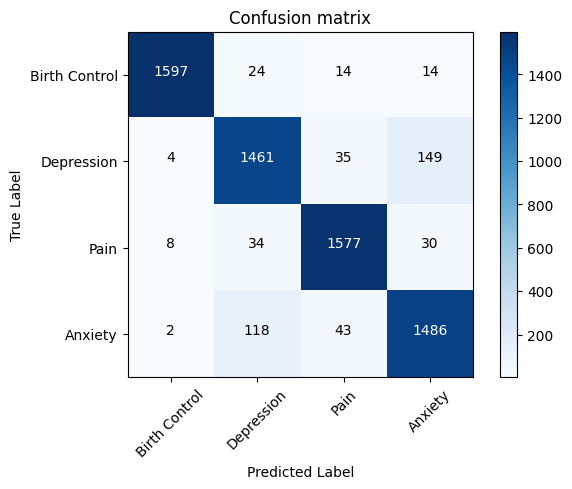

In [55]:
cm=metrics.confusion_matrix(y_test,pred_pac,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [56]:
print("Accuracy:", score_pac)

Accuracy: 0.8961491813220134


**TFIDF**

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train_2=tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2=tfidf_vectorizer.transform(X_test)

**Naive Bayes Classifier**

In [59]:
mnb=MultinomialNB()
mnb.fit(tfidf_train_2,y_train)
pred=mnb.predict(tfidf_test_2)
score_tfidf=metrics.accuracy_score(y_test,pred)

Confusion matrix,without normalization


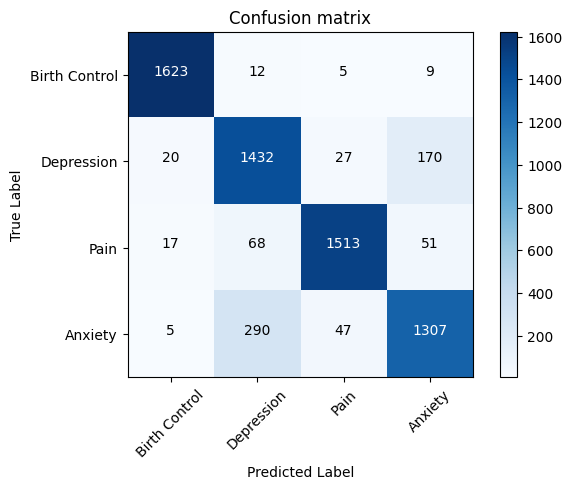

In [60]:
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [61]:
print("Accuracy:", score_tfidf)

Accuracy: 0.8906913280776229


**Passive Aggressive Classifier**

In [62]:
passive.fit(tfidf_train_2,y_train)
pred_pac_2=passive.predict(tfidf_test_2)
score_pac_2=metrics.accuracy_score(y_test,pred_pac_2)

Confusion matrix,without normalization


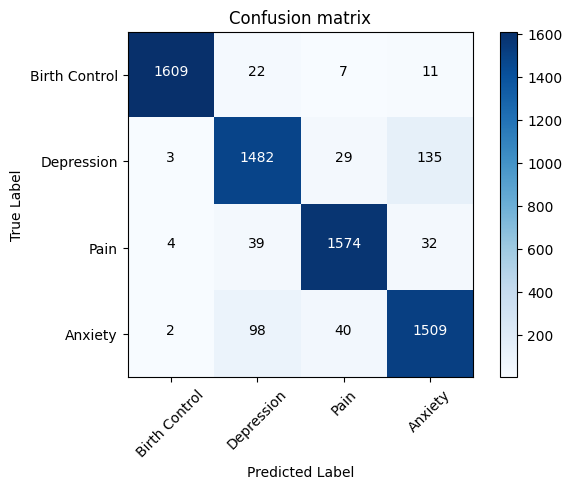

In [63]:
cm=metrics.confusion_matrix(y_test,pred_pac_2,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [64]:
print("Accuracy:", score_pac_2)

Accuracy: 0.9360218314129776


**Support Vector Machine**

In [58]:
from sklearn.svm import SVC

In [59]:
svm_model = SVC(kernel='linear',C=1.0,degree=3,gamma='scale',verbose=False,max_iter=-1,random_state=None)

In [61]:
svm_model.fit(tfidf_train_2,y_train)
pred_svc_2=svm_model.predict(tfidf_test_2)
score_svc_2=metrics.accuracy_score(y_test,pred_svc_2)

Confusion matrix,without normalization


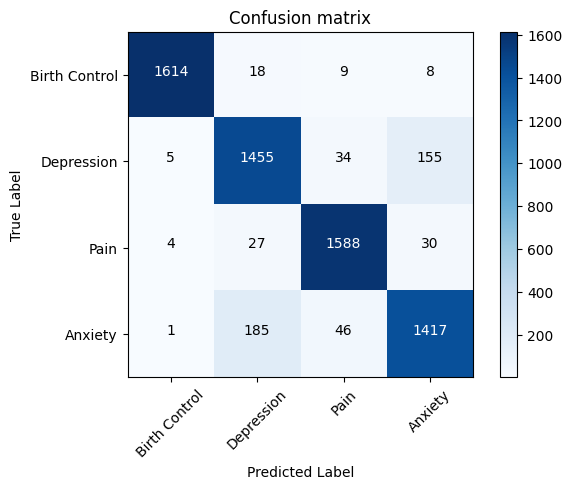

In [62]:
cm=metrics.confusion_matrix(y_test,pred_svc_2,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [63]:
print("Accuracy:",score_svc_2)

Accuracy: 0.9208611279563371


**Random Forest Classifier**

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',n_jobs=1,random_state=42,verbose=10,min_samples_split=2,max_features='log2')

In [64]:
rf_model.fit(tfidf_train_2,y_train)
pred_rf_2=rf_model.predict(tfidf_test_2)
score_rf_2=metrics.accuracy_score(y_test,pred_rf_2)

building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.4s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.4s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100


[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    2.8s


building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    5.1s


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    6.9s


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    9.4s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:   11.9s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   15.2s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   19.0s


building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100


[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:   22.9s


building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100


[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:   26.8s


building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100


[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:   32.2s


building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100


[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:   36.8s


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  84 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.5s


Confusion matrix,without normalization


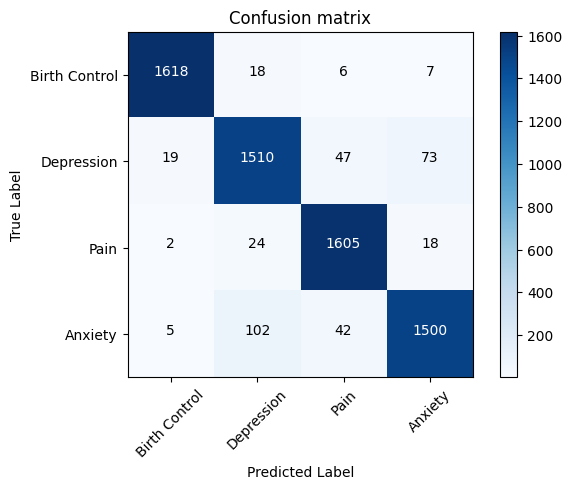

In [65]:
cm=metrics.confusion_matrix(y_test,pred_rf_2,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [66]:
print("Accuracy:",score_rf_2)

Accuracy: 0.9449666464523954


**Gradient Boosting Machine**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, min_samples_split=2, min_samples_leaf=1)

In [70]:
gbm_model.fit(tfidf_train_2,y_train)
pred_gbm_2=gbm_model.predict(tfidf_test_2)
score_gbm_2=metrics.accuracy_score(y_test,pred_gbm_2)

Confusion matrix,without normalization


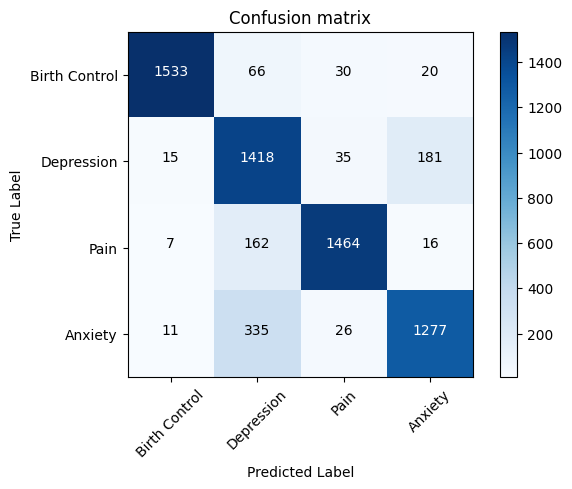

In [71]:
cm=metrics.confusion_matrix(y_test,pred_gbm_2,labels=['Birth Control','Depression','Pain','Anxiety'])
plot_confusion_matrix(cm,classes=['Birth Control','Depression','Pain','Anxiety'])

In [72]:
print("Accuracy:",score_gbm_2)

Accuracy: 0.8629472407519709


**Deployment using Gradio**

In [65]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existin

In [74]:
import gradio as gr

In [ ]:
def condition(review):
  return passive.predict(review)

In [ ]:
interface=gr.Interface(fn=condition, inputs='text', outputs='text')

In [ ]:
interface=gr.Interface(fn=condition,
                       inputs=gr.Textbox(lines=5,placeholder="Enter the review here....."),
                       examples=[["Geodon is a very effective drug for me.Completely wiped out the auditory hallucinations."]],
                       outputs="text")

In [ ]:
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d3af3ad618e43386fe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
